In [4]:
%pip install IPython
%pip install langgraph

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from langgraph.graph import StateGraph , START , END , MessagesState

In [5]:
def mock_llm(state: MessagesState):
    return {"messages": [{"role": "ai", "content": "Hello world"}]}
    

In [ ]:
graph = StateGraph(MessagesState)
graph.add_node(mock_llm)
graph.add_edge(START , "mock_llm")
graph.add_edge("mock_llm" , END)
workflow = graph.compile()

workflow.invoke({"messages": [{"role": "user", "content": "Hello, how are you?"}]})


{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='ab506731-d686-4eff-af70-fd87d4d4f0ed'),
  AIMessage(content='Hello world', additional_kwargs={}, response_metadata={}, id='99f6a5e3-6b53-4d10-bc5f-9eb78d150ba9')]}

{'question': 'what is the capital of France?', 'answer': 'you asked : what is the capital of France?'}


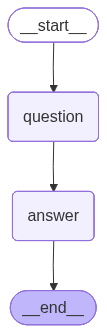

In [21]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image

class MyState(TypedDict, total=False):
    question: str
    answer: str

def question_parse(state: MyState):
    return {"question": state["question"]}

def answer_parse(state: MyState):
    ans = f"you asked : {state['question']}"
    return {"answer": ans}

graph = StateGraph(MyState)
graph.add_node("question", question_parse)
graph.add_node("answer", answer_parse)

graph.add_edge(START, "question")
graph.add_edge("question", "answer")
graph.add_edge("answer", END)

app = graph.compile()

# run it
result = app.invoke({"question": "what is the capital of France?"})
print(result)

# show graph
Image(app.get_graph().draw_mermaid_png())
